## Leito de Ocupação em 2022 ( COVID-19 )

A ocupação de leitos de COVID-19 em 2022 foi um tema de grande relevância e preocupação em todo o mundo. Devido à persistência da pandemia e ao surgimento de novas variantes do vírus, muitas regiões enfrentaram desafios na gestão dos leitos hospitalares e no atendimento adequado aos pacientes infectados.

Durante o ano de 2022, a ocupação de leitos de COVID-19 variou significativamente em diferentes países, estados e cidades. Essa ocupação foi influenciada por diversos fatores, como a taxa de transmissão do vírus, a eficácia das medidas de contenção adotadas, a disponibilidade de vacinas, a capacidade do sistema de saúde e o comportamento da população em relação às medidas de prevenção.

Em muitos locais, a alta demanda por leitos de UTI (Unidade de Terapia Intensiva) e leitos de enfermaria para pacientes com COVID-19 resultou em taxas de ocupação elevadas, o que colocou uma pressão significativa nos sistemas de saúde. Isso levou a desafios como falta de leitos disponíveis, sobrecarga dos profissionais de saúde e a necessidade de realocação de recursos para enfrentar a crise.

A ocupação de leitos de COVID-19 também pode ter variado ao longo do ano de 2022 devido a flutuações na incidência de casos, surtos localizados, sazonalidade, avanço das campanhas de vacinação e a implementação de estratégias de controle mais efetivas.

A análise e monitoramento da ocupação de leitos de COVID-19 em 2022 são de extrema importância para auxiliar no planejamento e tomada de decisões das autoridades de saúde. Essa análise permite identificar regiões com alta demanda e direcionar recursos adequados, além de fornecer informações para a implementação de medidas preventivas e estratégias de mitigação.

É fundamental destacar que a ocupação de leitos de COVID-19 está diretamente relacionada à proteção da saúde da população e ao controle da propagação do vírus. Portanto, é necessário um esforço contínuo e coordenado de todos os setores da sociedade para enfrentar os desafios decorrentes da ocupação de leitos e garantir a assistência adequada aos pacientes afetados pela doença.

É importante ressaltar que essa contextualização é uma visão geral e genérica sobre a ocupação de leitos de COVID-19 em 2022, e a situação específica pode variar consideravelmente em diferentes localidades. Para uma análise mais precisa e detalhada, é recomendável consultar dados e informações específicas do local de interesse.

# fonte de dados

https://opendatasus.saude.gov.br/dataset/95552cee-904a-468e-a72f-99f14a056734/resource/a8dc8a3f-1f96-45d0-a8a8-c279af76300f 

# Realizando o Processso de  importacao das lingaugens 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import metrics
from scipy.stats import ks_2samp
from scipy.stats import t
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [2]:
cs = pd.read_csv('LeitoOcupacao_2022 (1).csv')
cs.head()

C:\Users\marce\AppData\Local\Temp\ipykernel_13316\289723189.py:1: DtypeWarning: Columns (0,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  cs = pd.read_csv('LeitoOcupacao.csv')


,Unnamed: 0,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,ocupacaoCovidUti,ocupacaoCovidCli,...,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
0,641508,PBGTlqtFBP,2022-01-17T03:00:00.000Z,2379341,13.0,8.0,0.0,0.0,0.0,1.0,...,parse-cloud,_User$m6WdvZgbBS,Santa Catarina,Mafra,Santa Catarina,Mafra,False,False,2021-02-15T11:08:07.797Z,2022-01-17T21:56:42.351Z
1,1275198,ipPHkH1yIB,2022-01-05T03:00:00.000Z,2594366,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$C2nTBR5lmy,Paraná,Umuarama,Paraná,Umuarama,False,False,2021-12-08T10:42:04.123Z,2022-01-05T14:17:35.799Z
2,1290474,oDyVTndNXc,2022-01-01T03:00:50.682Z,2747871,NaN,NaN,NaN,NaN,1.0,9.0,...,parse-cloud,_User$APEoiAf61c,São Paulo,Ilhabela,São Paulo,Ilhabela,False,False,2022-01-01T03:34:58.234Z,2022-01-01T03:34:58.234Z
3,1290489,cTrwNtInVV,2022-01-01T03:00:08.570Z,2082497,NaN,NaN,NaN,NaN,0.0,1.0,...,parse-cloud,_User$q0FgtTNz2d,São Paulo,Bernardino de Campos,São Paulo,Bernardino de Campos,False,False,2022-01-01T04:50:29.194Z,2022-01-01T04:50:29.194Z
4,1290490,CPkiO32WyI,2022-01-01T03:00:14.691Z,2092980,NaN,NaN,NaN,NaN,0.0,0.0,...,parse-cloud,_User$u4yOaQOJlf,São Paulo,Bastos,São Paulo,Bastos,False,False,2022-01-01T05:01:31.468Z,2022-01-01T05:01:31.468Z


## Amostragem




In [3]:
cs.min()

C:\Users\marce\AppData\Local\Temp\ipykernel_13316\4011902196.py:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cs.min()


ocupacaoSuspeitoCli       13.0
ocupacaoSuspeitoUti        8.0
ocupacaoConfirmadoCli      0.0
ocupacaoConfirmadoUti      0.0
ocupacaoCovidUti          -7.0
ocupacaoCovidCli          -1.0
ocupacaoHospitalarUti     -5.0
ocupacaoHospitalarCli     -1.0
saidaSuspeitaObitos       -5.0
saidaSuspeitaAltas        -5.0
saidaConfirmadaObitos     -2.0
saidaConfirmadaAltas      -6.0
excluido                 False
validado                 False
dtype: object

In [4]:
cs.max()

C:\Users\marce\AppData\Local\Temp\ipykernel_13316\3846702268.py:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cs.max()


ocupacaoSuspeitoCli         13.0
ocupacaoSuspeitoUti          8.0
ocupacaoConfirmadoCli        0.0
ocupacaoConfirmadoUti        0.0
ocupacaoCovidUti           300.0
ocupacaoCovidCli         21701.0
ocupacaoHospitalarUti     8191.0
ocupacaoHospitalarCli    21701.0
saidaSuspeitaObitos        596.0
saidaSuspeitaAltas        3292.0
saidaConfirmadaObitos     3300.0
saidaConfirmadaAltas      9167.0
excluido                   False
validado                   False
dtype: object

In [5]:
meses = 10
data = pd.Series(pd.date_range('1/1/2022', periods = meses, freq = 'MS'))
date = pd.DataFrame(data)
date = date.rename({0:'oot'}, axis = 'columns')
date

,oot
0,2022-01-01
1,2022-02-01
2,2022-03-01
3,2022-04-01
4,2022-05-01
5,2022-06-01
6,2022-07-01
7,2022-08-01
8,2022-09-01
9,2022-10-01


## Descritiva básica univariada


In [6]:
print('número de linhas: {0}'.format(cs.shape[0]))
date.value_counts()

número de linhas: 291877


oot       
2022-01-01    1
2022-02-01    1
2022-03-01    1
2022-04-01    1
2022-05-01    1
2022-06-01    1
2022-07-01    1
2022-08-01    1
2022-09-01    1
2022-10-01    1
dtype: int64

In [9]:
cs.value_counts()

Unnamed: 0  _id         dataNotificacao           cnes     ocupacaoSuspeitoCli  ocupacaoSuspeitoUti  ocupacaoConfirmadoCli  ocupacaoConfirmadoUti  ocupacaoCovidUti  ocupacaoCovidCli  ocupacaoHospitalarUti  ocupacaoHospitalarCli  saidaSuspeitaObitos  saidaSuspeitaAltas  saidaConfirmadaObitos  saidaConfirmadaAltas  origem       _p_usuario        estadoNotificacao  municipioNotificacao  estado          municipio  excluido  validado  _created_at               _updated_at             
641508      PBGTlqtFBP  2022-01-17T03:00:00.000Z  2379341  13.0                 8.0                  0.0                    0.0                    0.0               1.0               8.0                    12.0                   0.0                  1.0                 0.0                    1.0                   parse-cloud  _User$m6WdvZgbBS  Santa Catarina     Mafra                 Santa Catarina  Mafra      False     False     2021-02-15T11:08:07.797Z  2022-01-17T21:56:42.351Z    1
dtype: int64

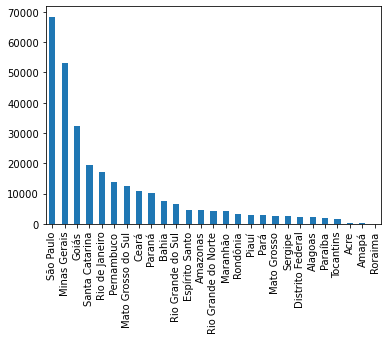

In [7]:
var = 'estado'
grafico_barras = cs[var].value_counts().plot.bar()

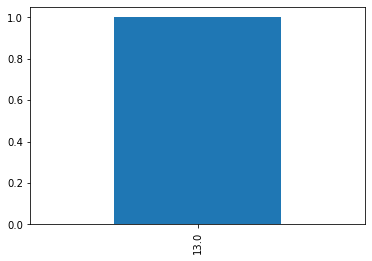

In [8]:
var = 'ocupacaoSuspeitoCli'
grafico_barras = cs[var].value_counts().plot.bar()

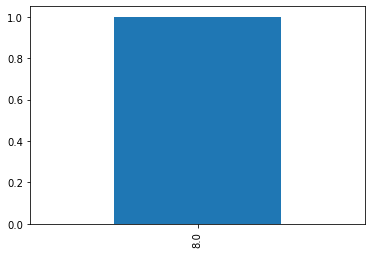

In [11]:
var = 'ocupacaoSuspeitoUti'
grafico_barras = cs[var].value_counts().plot.bar()

In [12]:
cs.value_counts()

Unnamed: 0  _id         dataNotificacao           cnes     ocupacaoSuspeitoCli  ocupacaoSuspeitoUti  ocupacaoConfirmadoCli  ocupacaoConfirmadoUti  ocupacaoCovidUti  ocupacaoCovidCli  ocupacaoHospitalarUti  ocupacaoHospitalarCli  saidaSuspeitaObitos  saidaSuspeitaAltas  saidaConfirmadaObitos  saidaConfirmadaAltas  origem       _p_usuario        estadoNotificacao  municipioNotificacao  estado          municipio  excluido  validado  _created_at               _updated_at             
641508      PBGTlqtFBP  2022-01-17T03:00:00.000Z  2379341  13.0                 8.0                  0.0                    0.0                    0.0               1.0               8.0                    12.0                   0.0                  1.0                 0.0                    1.0                   parse-cloud  _User$m6WdvZgbBS  Santa Catarina     Mafra                 Santa Catarina  Mafra      False     False     2021-02-15T11:08:07.797Z  2022-01-17T21:56:42.351Z    1
dtype: int64

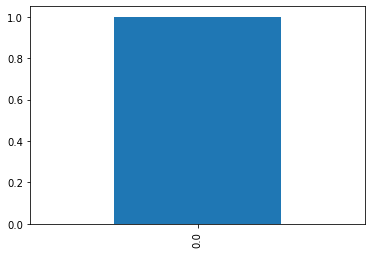

In [13]:
var = 'ocupacaoConfirmadoCli'
grafico_barras = cs[var].value_counts().plot.bar()

<Figure size 432x288 with 0 Axes>

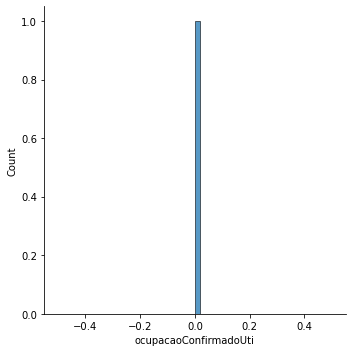

In [16]:
plt.clf()
var = "ocupacaoConfirmadoUti"
sns.displot(cs, x = var, bins = 50)
plt.show()

<Figure size 432x288 with 0 Axes>

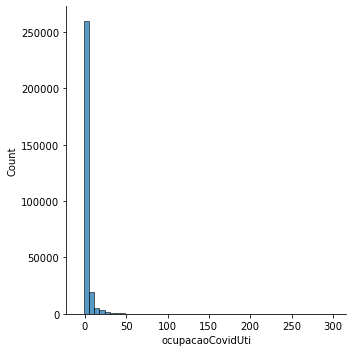

In [15]:
plt.clf()
var = "ocupacaoCovidUti"
sns.displot(cs, x = var, bins = 50)
plt.show()

<Figure size 432x288 with 0 Axes>

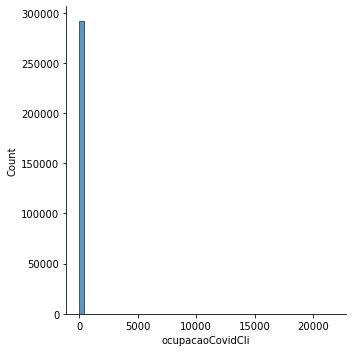

In [19]:
plt.clf()
var = "ocupacaoCovidCli"
sns.displot(cs, x = var, bins = 50)
plt.show()

In [17]:
cs.value_counts()

Unnamed: 0  _id         dataNotificacao           cnes     ocupacaoSuspeitoCli  ocupacaoSuspeitoUti  ocupacaoConfirmadoCli  ocupacaoConfirmadoUti  ocupacaoCovidUti  ocupacaoCovidCli  ocupacaoHospitalarUti  ocupacaoHospitalarCli  saidaSuspeitaObitos  saidaSuspeitaAltas  saidaConfirmadaObitos  saidaConfirmadaAltas  origem       _p_usuario        estadoNotificacao  municipioNotificacao  estado          municipio  excluido  validado  _created_at               _updated_at             
641508      PBGTlqtFBP  2022-01-17T03:00:00.000Z  2379341  13.0                 8.0                  0.0                    0.0                    0.0               1.0               8.0                    12.0                   0.0                  1.0                 0.0                    1.0                   parse-cloud  _User$m6WdvZgbBS  Santa Catarina     Mafra                 Santa Catarina  Mafra      False     False     2021-02-15T11:08:07.797Z  2022-01-17T21:56:42.351Z    1
dtype: int64

<Figure size 432x288 with 0 Axes>

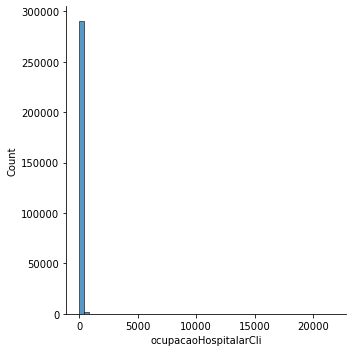

In [21]:
plt.clf()
var = "ocupacaoHospitalarCli"
sns.displot(cs, x = var, bins = 50)
plt.show()

<Figure size 432x288 with 0 Axes>

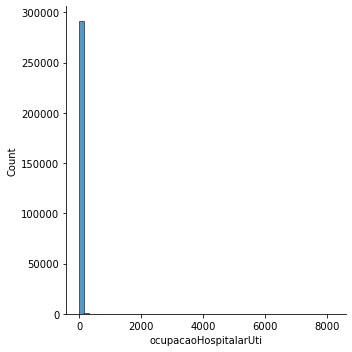

In [22]:
plt.clf()
var = "ocupacaoHospitalarUti"
sns.displot(cs, x = var, bins = 50)
plt.show()

<Figure size 432x288 with 0 Axes>

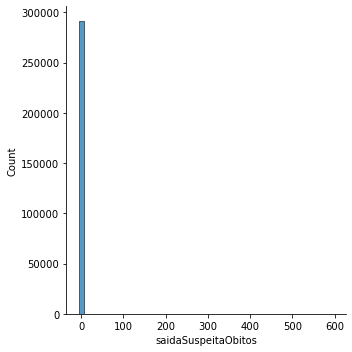

In [43]:
plt.clf()
var = "saidaSuspeitaObitos"
sns.displot(cs, x = var, bins = 50)
plt.show()

In [23]:
cs.value_counts()

Unnamed: 0  _id         dataNotificacao           cnes     ocupacaoSuspeitoCli  ocupacaoSuspeitoUti  ocupacaoConfirmadoCli  ocupacaoConfirmadoUti  ocupacaoCovidUti  ocupacaoCovidCli  ocupacaoHospitalarUti  ocupacaoHospitalarCli  saidaSuspeitaObitos  saidaSuspeitaAltas  saidaConfirmadaObitos  saidaConfirmadaAltas  origem       _p_usuario        estadoNotificacao  municipioNotificacao  estado          municipio  excluido  validado  _created_at               _updated_at             
641508      PBGTlqtFBP  2022-01-17T03:00:00.000Z  2379341  13.0                 8.0                  0.0                    0.0                    0.0               1.0               8.0                    12.0                   0.0                  1.0                 0.0                    1.0                   parse-cloud  _User$m6WdvZgbBS  Santa Catarina     Mafra                 Santa Catarina  Mafra      False     False     2021-02-15T11:08:07.797Z  2022-01-17T21:56:42.351Z    1
dtype: int64

<Figure size 432x288 with 0 Axes>

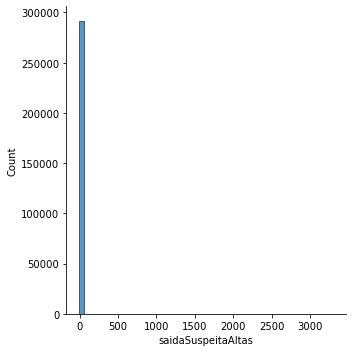

In [13]:
plt.clf()
var = "saidaSuspeitaAltas"
sns.displot(cs, x = var, bins = 50)
plt.show()

<Figure size 432x288 with 0 Axes>

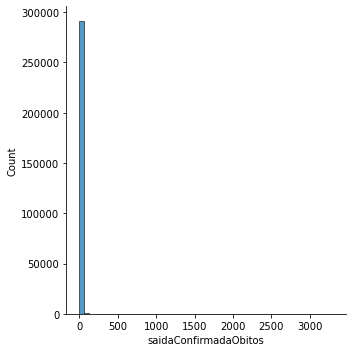

In [26]:
plt.clf()
var = "saidaConfirmadaObitos"
sns.displot(cs, x = var, bins = 50)
plt.show()

<Figure size 432x288 with 0 Axes>

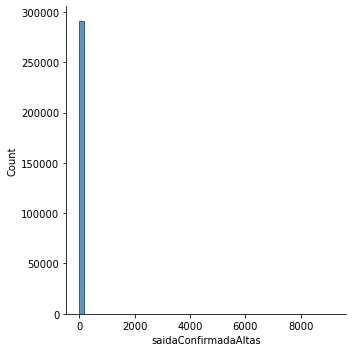

In [27]:
plt.clf()
var = "saidaConfirmadaAltas"
sns.displot(cs, x = var, bins = 50)
plt.show()

c:\Users\marce\anaconda3\lib\site-packages\seaborn\distributions.py:461: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\marce\anaconda3\lib\site-packages\seaborn\distributions.py:462: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


<Figure size 432x288 with 0 Axes>

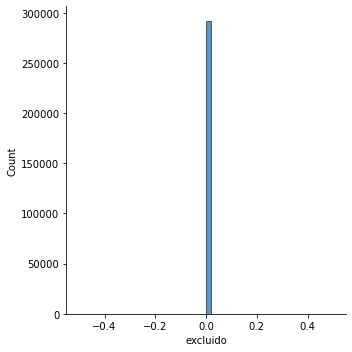

In [28]:
plt.clf()
var = "excluido"
sns.displot(cs, x = var, bins = 50)
plt.show()

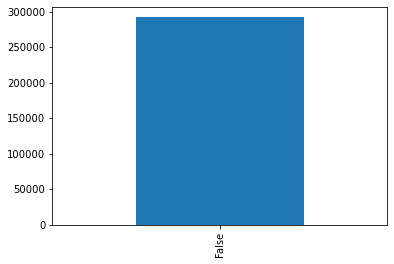

In [29]:
var = 'validado'
grafico_barras = cs[var].value_counts().plot.bar()

## Descritiva bivariada

<AxesSubplot:xlabel='ocupacaoSuspeitoCli', ylabel='ocupacaoSuspeitoUti'>

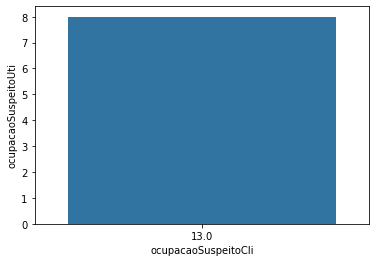

In [32]:
sns.barplot(x='ocupacaoSuspeitoCli', y = 'ocupacaoSuspeitoUti', data=cs)

<AxesSubplot:xlabel='ocupacaoConfirmadoCli', ylabel='ocupacaoConfirmadoUti'>

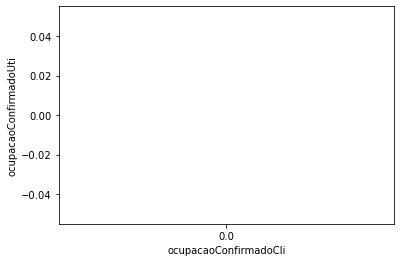

In [33]:
sns.barplot(x='ocupacaoConfirmadoCli', y = 'ocupacaoConfirmadoUti', data=cs)

<AxesSubplot:xlabel='ocupacaoCovidUti', ylabel='ocupacaoCovidCli'>

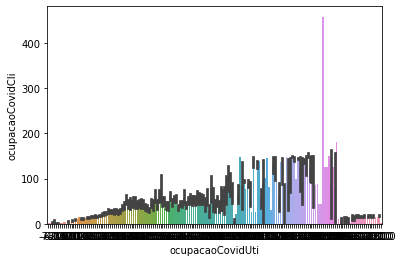

In [34]:
sns.barplot(x='ocupacaoCovidUti', y = 'ocupacaoCovidCli', data=cs)

<AxesSubplot:xlabel='estado', ylabel='ocupacaoCovidCli'>

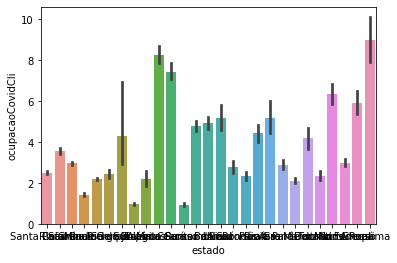

In [35]:
sns.barplot(x='estado', y = 'ocupacaoCovidCli', data=cs)

<AxesSubplot:xlabel='estado', ylabel='ocupacaoCovidUti'>

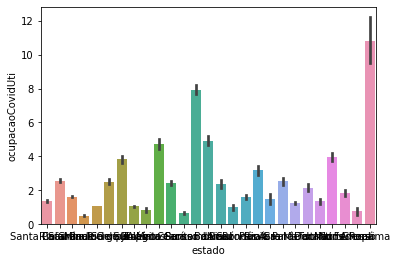

In [38]:
sns.barplot(x='estado', y = 'ocupacaoCovidUti', data=cs)

<AxesSubplot:xlabel='estado', ylabel='ocupacaoHospitalarCli'>

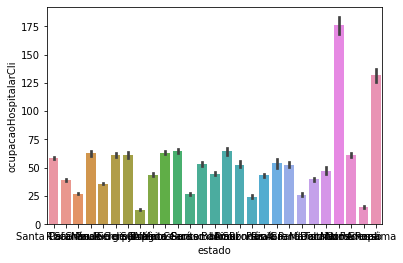

In [37]:
sns.barplot(x='estado', y = 'ocupacaoHospitalarCli', data=cs)

<AxesSubplot:xlabel='estado', ylabel='ocupacaoHospitalarUti'>

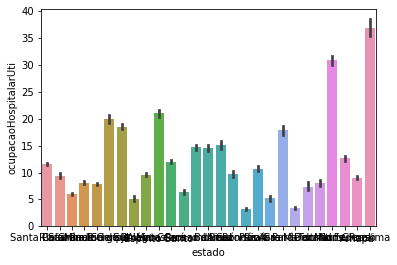

In [39]:
sns.barplot(x='estado', y = 'ocupacaoHospitalarUti', data=cs)

<AxesSubplot:xlabel='estado', ylabel='saidaSuspeitaObitos'>

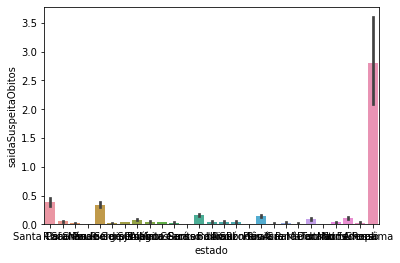

In [41]:
sns.barplot(x='estado', y = 'saidaSuspeitaObitos', data=cs)

<AxesSubplot:xlabel='estado', ylabel='saidaSuspeitaAltas'>

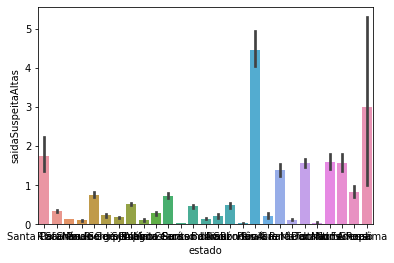

In [51]:
sns.barplot(x='estado', y = 'saidaSuspeitaAltas', data=cs)

<AxesSubplot:xlabel='estado', ylabel='saidaConfirmadaAltas'>

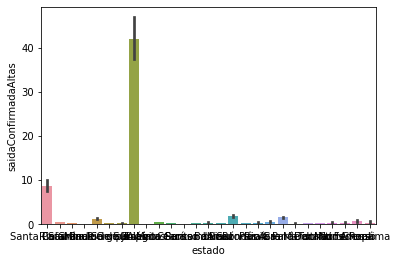

In [43]:
sns.barplot(x='estado', y = 'saidaConfirmadaAltas', data=cs)

<AxesSubplot:xlabel='estado', ylabel='saidaConfirmadaObitos'>

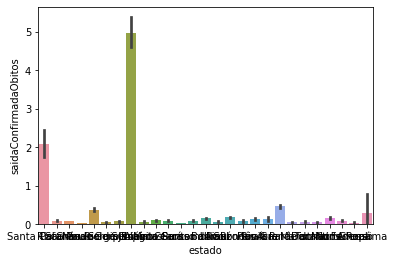

In [52]:
sns.barplot(x='estado', y = 'saidaConfirmadaObitos', data=cs)

<AxesSubplot:xlabel='estado', ylabel='ocupacaoSuspeitoCli'>

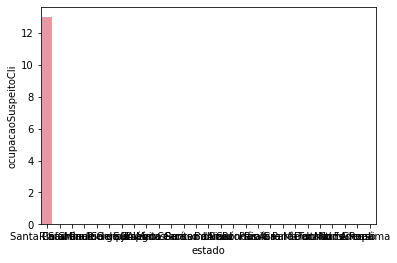

In [53]:
sns.barplot(x='estado', y = 'ocupacaoSuspeitoCli', data=cs)

<AxesSubplot:xlabel='estado', ylabel='ocupacaoSuspeitoUti'>

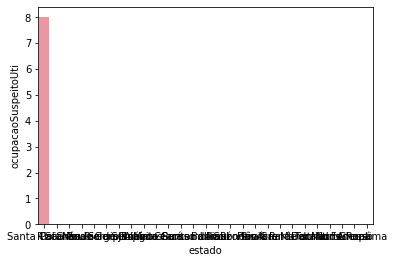

In [54]:
sns.barplot(x='estado', y = 'ocupacaoSuspeitoUti', data=cs)

In [11]:
pd.crosstab(cs['estado'], cs['saidaConfirmadaObitos'])

saidaConfirmadaObitos,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,478.0,480.0,485.0,504.0,505.0,506.0,510.0,546.0,641.0,3300.0
estado,,,,,,,,,,,,,,,,,,,,,
Acre,0,0,369,23,11,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alagoas,0,0,1990,74,15,11,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Amapá,0,0,385,8,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amazonas,0,0,4027,147,101,61,38,10,3,5,...,0,0,0,0,0,0,0,0,0,0
Bahia,0,0,6892,529,143,52,23,10,9,3,...,0,0,0,0,0,0,0,0,0,0
Ceará,0,0,10219,489,105,38,30,8,2,1,...,0,0,0,0,0,0,0,0,0,0
Distrito Federal,0,0,2058,237,55,4,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Espírito Santo,0,1,4059,252,52,19,7,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Goiás,0,0,28867,639,90,20,8,2,41,115,...,1,2,12,3,3,3,4,1,1,1


In [58]:
pd.crosstab(cs['estado'], cs['ocupacaoSuspeitoUti'])

ocupacaoSuspeitoUti,8.0
estado,
Santa Catarina,1


In [59]:
pd.crosstab(cs['estado'], cs['ocupacaoSuspeitoCli'])

ocupacaoSuspeitoCli,13.0
estado,
Santa Catarina,1


In [60]:
pd.crosstab(cs['estado'], cs['saidaConfirmadaObitos'])

saidaConfirmadaObitos,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,478.0,480.0,485.0,504.0,505.0,506.0,510.0,546.0,641.0,3300.0
estado,,,,,,,,,,,,,,,,,,,,,
Acre,0,0,369,23,11,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alagoas,0,0,1990,74,15,11,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Amapá,0,0,385,8,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amazonas,0,0,4027,147,101,61,38,10,3,5,...,0,0,0,0,0,0,0,0,0,0
Bahia,0,0,6892,529,143,52,23,10,9,3,...,0,0,0,0,0,0,0,0,0,0
Ceará,0,0,10219,489,105,38,30,8,2,1,...,0,0,0,0,0,0,0,0,0,0
Distrito Federal,0,0,2058,237,55,4,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Espírito Santo,0,1,4059,252,52,19,7,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Goiás,0,0,28867,639,90,20,8,2,41,115,...,1,2,12,3,3,3,4,1,1,1


In [12]:
pd.crosstab(cs['estado'], cs['saidaConfirmadaAltas'])

saidaConfirmadaAltas,-6.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,...,6900.0,7038.0,7120.0,8120.0,8890.0,8950.0,9001.0,9015.0,9166.0,9167.0
estado,,,,,,,,,,,,,,,,,,,,,
Acre,0,0,0,0,316,39,20,11,8,5,...,0,0,0,0,0,0,0,0,0,0
Alagoas,0,0,0,0,1919,103,38,16,9,3,...,0,0,0,0,0,0,0,0,0,0
Amapá,0,0,0,0,296,47,18,13,8,3,...,0,0,0,0,0,0,0,0,0,0
Amazonas,0,0,1,0,3442,319,150,69,56,26,...,0,0,0,0,0,0,0,0,0,0
Bahia,0,0,0,0,6372,708,261,106,59,39,...,0,0,0,0,0,0,0,0,0,0
Ceará,0,0,0,4,9456,755,272,135,74,51,...,0,0,0,0,0,0,0,0,0,0
Distrito Federal,0,0,0,0,1938,228,97,30,28,16,...,0,0,0,0,0,0,0,0,0,0
Espírito Santo,0,0,1,0,3528,381,176,109,64,69,...,0,0,0,0,0,0,0,0,0,0
Goiás,0,0,0,0,28359,1732,552,217,106,48,...,5,5,2,2,1,8,1,1,1,1


In [13]:
pd.crosstab(cs['estado'], cs['saidaSuspeitaAltas'])

saidaSuspeitaAltas,-5.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,...,309.0,311.0,313.0,314.0,315.0,316.0,317.0,319.0,387.0,3292.0
estado,,,,,,,,,,,,,,,,,,,,,
Acre,0,0,0,0,350,40,9,4,2,2,...,0,0,0,0,0,0,0,0,0,0
Alagoas,0,0,0,0,1972,71,18,11,8,5,...,0,0,0,0,0,0,0,0,0,0
Amapá,0,0,0,0,234,84,36,20,7,6,...,0,0,0,0,0,0,0,0,0,0
Amazonas,0,0,0,0,4111,55,21,9,7,6,...,0,0,0,0,0,0,0,0,0,0
Bahia,0,0,0,0,7016,390,149,56,24,13,...,0,0,0,0,0,0,0,0,0,0
Ceará,0,0,0,10,9319,659,305,148,85,50,...,0,0,0,0,0,0,0,0,0,0
Distrito Federal,0,0,0,0,1789,161,84,32,21,23,...,0,0,0,0,0,0,0,0,0,0
Espírito Santo,0,1,3,3,3875,240,123,52,33,27,...,0,0,0,0,0,0,0,0,0,0
Goiás,0,0,0,0,28695,1048,632,396,270,164,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.crosstab(cs['estado'], cs['saidaConfirmadaAltas'])

In [14]:
pd.crosstab(cs['estado'], cs['ocupacaoSuspeitoCli'])

ocupacaoSuspeitoCli,13.0
estado,
Santa Catarina,1


In [15]:
pd.crosstab(cs['estado'], cs['ocupacaoHospitalarUti'])

ocupacaoHospitalarUti,-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,...,306.0,338.0,370.0,390.0,391.0,480.0,1400.0,1600.0,3635.0,8191.0
estado,,,,,,,,,,,,,,,,,,,,,
Acre,0,0,0,0,0,107,1,10,28,40,...,0,0,0,0,0,0,0,0,0,0
Alagoas,0,0,0,0,0,364,2,13,25,70,...,0,0,0,0,0,0,0,0,0,0
Amapá,0,0,0,0,0,34,11,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Amazonas,1,0,0,0,0,2505,243,69,77,83,...,0,0,0,0,0,0,0,0,0,0
Bahia,0,0,0,0,0,2955,133,151,153,177,...,0,0,0,0,0,0,1,0,0,0
Ceará,0,1,0,0,0,5241,90,119,159,175,...,0,0,0,0,0,0,0,0,0,0
Distrito Federal,0,0,0,0,0,57,0,1,2,7,...,0,0,0,0,0,0,0,0,0,0
Espírito Santo,0,0,0,0,0,771,2,8,17,49,...,0,0,0,0,0,0,0,0,0,0
Goiás,0,0,0,0,0,23316,253,246,405,671,...,0,0,0,0,0,0,0,0,0,1


In [61]:
pd.crosstab(cs['estado'], cs['ocupacaoCovidUti'])

ocupacaoCovidUti,-7.0,-6.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,...,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,210.0,300.0
estado,,,,,,,,,,,,,,,,,,,,,
Acre,0,0,0,0,0,0,239,50,44,37,...,0,0,0,0,0,0,0,0,0,0
Alagoas,0,0,0,0,0,0,1640,213,56,52,...,0,0,0,0,0,0,0,0,0,0
Amapá,0,0,0,0,0,0,312,33,12,3,...,0,0,0,0,0,0,0,0,0,0
Amazonas,0,0,0,0,0,0,3889,156,65,57,...,0,0,0,0,0,0,0,0,0,0
Bahia,0,0,0,0,0,1,3675,627,393,344,...,0,0,0,0,0,0,0,0,0,0
Ceará,0,1,0,0,0,4,7547,495,373,215,...,0,0,0,0,0,0,0,0,0,0
Distrito Federal,0,0,0,0,0,0,1456,37,20,48,...,0,0,0,0,0,0,0,0,0,0
Espírito Santo,0,0,0,1,2,2,2313,312,197,137,...,0,0,0,0,0,0,0,0,0,0
Goiás,0,0,0,0,0,2,27187,1598,871,481,...,0,0,0,0,0,0,0,0,0,0


In [62]:
pd.crosstab(cs['estado'], cs['ocupacaoCovidUti'])

ocupacaoCovidUti,-7.0,-6.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,...,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,210.0,300.0
estado,,,,,,,,,,,,,,,,,,,,,
Acre,0,0,0,0,0,0,239,50,44,37,...,0,0,0,0,0,0,0,0,0,0
Alagoas,0,0,0,0,0,0,1640,213,56,52,...,0,0,0,0,0,0,0,0,0,0
Amapá,0,0,0,0,0,0,312,33,12,3,...,0,0,0,0,0,0,0,0,0,0
Amazonas,0,0,0,0,0,0,3889,156,65,57,...,0,0,0,0,0,0,0,0,0,0
Bahia,0,0,0,0,0,1,3675,627,393,344,...,0,0,0,0,0,0,0,0,0,0
Ceará,0,1,0,0,0,4,7547,495,373,215,...,0,0,0,0,0,0,0,0,0,0
Distrito Federal,0,0,0,0,0,0,1456,37,20,48,...,0,0,0,0,0,0,0,0,0,0
Espírito Santo,0,0,0,1,2,2,2313,312,197,137,...,0,0,0,0,0,0,0,0,0,0
Goiás,0,0,0,0,0,2,27187,1598,871,481,...,0,0,0,0,0,0,0,0,0,0


In [63]:
pd.crosstab(cs['estado'], cs['ocupacaoHospitalarCli'])

ocupacaoHospitalarCli,-1.00,0.00,0.21,1.00,2.00,3.00,4.00,5.00,6.00,7.00,...,1007.00,1029.00,1033.00,1500.00,1910.00,2010.00,2018.00,3000.00,3002.00,21701.00
estado,,,,,,,,,,,,,,,,,,,,,
Acre,0,86,0,13,6,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alagoas,0,267,0,75,17,5,1,11,11,29,...,0,0,0,0,0,0,0,0,0,0
Amapá,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amazonas,0,50,0,90,133,189,198,204,276,127,...,0,0,0,0,0,0,0,1,1,0
Bahia,0,1765,0,222,168,148,121,96,196,103,...,0,0,0,0,0,0,0,0,0,0
Ceará,0,930,0,346,423,374,388,587,380,526,...,0,0,0,0,0,0,0,0,0,0
Distrito Federal,0,409,0,0,0,1,0,1,2,2,...,0,0,0,0,0,0,0,0,0,0
Espírito Santo,0,22,0,34,30,38,24,36,59,41,...,0,0,0,0,0,0,0,0,0,0
Goiás,0,12846,0,1545,1486,1252,1185,1100,940,765,...,0,0,0,0,0,0,0,0,0,0


In [64]:
pd.crosstab(cs['estado'], cs['ocupacaoHospitalarUti'])

ocupacaoHospitalarUti,-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,...,306.0,338.0,370.0,390.0,391.0,480.0,1400.0,1600.0,3635.0,8191.0
estado,,,,,,,,,,,,,,,,,,,,,
Acre,0,0,0,0,0,107,1,10,28,40,...,0,0,0,0,0,0,0,0,0,0
Alagoas,0,0,0,0,0,364,2,13,25,70,...,0,0,0,0,0,0,0,0,0,0
Amapá,0,0,0,0,0,34,11,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Amazonas,1,0,0,0,0,2505,243,69,77,83,...,0,0,0,0,0,0,0,0,0,0
Bahia,0,0,0,0,0,2955,133,151,153,177,...,0,0,0,0,0,0,1,0,0,0
Ceará,0,1,0,0,0,5241,90,119,159,175,...,0,0,0,0,0,0,0,0,0,0
Distrito Federal,0,0,0,0,0,57,0,1,2,7,...,0,0,0,0,0,0,0,0,0,0
Espírito Santo,0,0,0,0,0,771,2,8,17,49,...,0,0,0,0,0,0,0,0,0,0
Goiás,0,0,0,0,0,23316,253,246,405,671,...,0,0,0,0,0,0,0,0,0,1


## Desenvolvimento do modelo


In [65]:
cs.isna().sum()

Unnamed: 0                    0
_id                          11
dataNotificacao              11
cnes                         11
ocupacaoSuspeitoCli      291876
ocupacaoSuspeitoUti      291876
ocupacaoConfirmadoCli    291876
ocupacaoConfirmadoUti    291876
ocupacaoCovidUti             11
ocupacaoCovidCli             11
ocupacaoHospitalarUti        11
ocupacaoHospitalarCli        11
saidaSuspeitaObitos          11
saidaSuspeitaAltas           11
saidaConfirmadaObitos        11
saidaConfirmadaAltas         11
origem                       11
_p_usuario                   11
estadoNotificacao            11
municipioNotificacao         11
estado                       11
municipio                    11
excluido                     11
validado                     11
_created_at                  11
_updated_at                  11
dtype: int64

In [66]:
cs['estado'].fillna(cs['ocupacaoCovidUti'].mean())

0         Santa Catarina
1                 Paraná
2              São Paulo
3              São Paulo
4              São Paulo
               ...      
291872      Minas Gerais
291873             Ceará
291874           Paraíba
291875    Santa Catarina
291876         São Paulo
Name: estado, Length: 291877, dtype: object

In [67]:
metadados = pd.DataFrame(cs.dtypes, columns=['estado'])
metadados['municipio'] = cs.nunique()

metadados

,estado,municipio
Unnamed: 0,object,291877
_id,object,291866
dataNotificacao,object,141372
cnes,object,2032
ocupacaoSuspeitoCli,float64,1
ocupacaoSuspeitoUti,float64,1
ocupacaoConfirmadoCli,float64,1
ocupacaoConfirmadoUti,float64,1
ocupacaoCovidUti,float64,173
ocupacaoCovidCli,float64,201


In [68]:
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='estado')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['estado',rótulo_evento]
    tab['ep'] = tab[rótulo_evento]/tab.loc['estado',rótulo_evento]
    
    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['estado',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

In [69]:
iv_sexo = IV(cs.municipio, cs.estado)
print(f'IV da variável SEXO: {iv_sexo:.1%}')

IV da variável SEXO: inf%


c:\Users\marce\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [70]:
metadados = pd.DataFrame(cs.dtypes, columns=['dtype'])
metadados['valores_unicos'] = cs.nunique()
metadados['papel'] = 'covariavel'
metadados.loc['estado','papel'] = 'resposta'
metadados.loc['municipio','papel'] = 'resposta'
metadados

,dtype,valores_unicos,papel
Unnamed: 0,object,291877,covariavel
_id,object,291866,covariavel
dataNotificacao,object,141372,covariavel
cnes,object,2032,covariavel
ocupacaoSuspeitoCli,float64,1,covariavel
ocupacaoSuspeitoUti,float64,1,covariavel
ocupacaoConfirmadoCli,float64,1,covariavel
ocupacaoConfirmadoUti,float64,1,covariavel
ocupacaoCovidUti,float64,173,covariavel
ocupacaoCovidCli,float64,201,covariavel


In [71]:
for var in metadados[metadados.papel=='covid'].index:
    if (metadados.loc[var, 'valores_unicos']>6):
        metadados.loc[var, 'IV'] = IV(pd.qcut(cs[var],5,duplicates='drop'), cs.mau)
    else:
        metadados.loc[var, 'IV'] = IV(cs[var], cs.mau)
        
        
metadados

,dtype,valores_unicos,papel
Unnamed: 0,object,291877,covariavel
_id,object,291866,covariavel
dataNotificacao,object,141372,covariavel
cnes,object,2032,covariavel
ocupacaoSuspeitoCli,float64,1,covariavel
ocupacaoSuspeitoUti,float64,1,covariavel
ocupacaoConfirmadoCli,float64,1,covariavel
ocupacaoConfirmadoUti,float64,1,covariavel
ocupacaoCovidUti,float64,173,covariavel
ocupacaoCovidCli,float64,201,covariavel


In [72]:
def biv_discreta(var, cs):
    cs['estado'] = 1-cs.municipio
    g = cs.groupby(var)
    
    biv = pd.DataFrame({'qt_bom': g['estado'].sum(),
                       'qt_mau': g['municipio'].sum(),
                       'estado':g['municipio'].mean(),
                       var: g['municipio'].mean().index,
                       'cont':g[var].count()})
    biv['ep'] = (biv.mau*(1-biv.mau)/biv.cont)**.5
    biv['mau_sup'] = biv.mau+t.ppf([0.975], biv.cont-1)*biv.ep
    biv['mau_inf'] = biv.mau+t.ppf([0.025], biv.cont-1)*biv.ep
    
    biv['logit'] = np.log(biv.mau/(1-biv.mau))
    biv['logit_sup'] = np.log(biv.mau_sup/(1-biv.mau_sup))
    biv['logit_inf'] = np.log(biv.mau_sup/(1-biv.mau_inf))
    
    tx_mau_geral = cs.mau.mean()
    woe_geral = np.log(cs.mau.mean() / (1 - cs.mau.mean()))
    
    biv['woe'] = biv.logit - woe_geral
    biv['woe_sup'] = biv.logit_sup - woe_geral
    biv['woe_inf'] = biv.logit_inf - woe_geral
    
    fig, ax = plt.subplots(2,1, figsize=(8,6))
    ax[0].plot(biv[var], biv.woe,  ':bo', label='woe')
    ax[0].plot(biv[var], biv.woe_sup, 'o:r', label='limite superior')
    ax[0].plot(biv[var], biv.woe_inf, 'o:r', label='limite superior')
        
    num_cat = biv.shape[0]
    ax[0].set_xlim([-.3, num_cat-.7])
    
    ax[0].set_ylabel("Weight of Evidence")
    ax[0].legend(bbox_to_anchor=(.83, 1.17), ncol=3)
    
    ax[0].set_xticks(list(range(num_cat)))
    ax[0].set_xticklabels(biv[var], rotation=15)
    
    ax[1] = biv.cont.plot.bar()
    return biv

In [73]:
IV(cs.estado, cs.municipio)

c:\Users\marce\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


inf

In [74]:
# Substituir valores nas colunas
cs['estado'].replace('saidaConfirmadaAltas', inplace=True)
cs['saidaConfirmadaObitos'].replace('estado/saidaConfirmadaObitos', inplace=True)

# Criar tabela de frequência bivariada discreta
tabela_bivariada = pd.crosstab(cs['estado'], cs['saidaConfirmadaObitos'])

# Exibir a tabela
print(tabela_bivariada)

saidaConfirmadaObitos  -2.0     -1.0      0.0      1.0      2.0      3.0     \
estado                                                                        
Acre                         0        0      369       23       11        3   
Alagoas                      0        0     1990       74       15       11   
Amapá                        0        0      385        8        1        1   
Amazonas                     0        0     4027      147      101       61   
Bahia                        0        0     6892      529      143       52   
Ceará                        0        0    10219      489      105       38   
Distrito Federal             0        0     2058      237       55        4   
Espírito Santo               0        1     4059      252       52       19   
Goiás                        0        0    28867      639       90       20   
Maranhão                     0        0     3973      202       32        1   
Mato Grosso                  0        0     2255    

In [75]:
mapeamento = {
    'municipioNotificacao': 'estadoNotificacao',
    'municipio': 'municipioNotificacao',
    'Médio': 'estadoNotificacao'
}

cs['estado'] = cs['estado'].map(mapeamento)


In [76]:
cs['estado'] = cs['estado'].astype(str)


In [77]:
def biv_discreta(var1, var2):
    contingencia = pd.crosstab(var1, var2)
    return contingencia


In [78]:
cs['estado'] = pd.Categorical(cs['estado'])
biv_discreta(cs['estado'], cs['estado'])


estado,nan
estado,
nan,291877


In [79]:
biv_discreta(cs['municipio'], cs['estado'])


estado,nan
municipio,
Abadia de Goiás,127
Acarape,340
Acreúna,466
Adamantina,184
Afogados da Ingazeira,241
...,...
Água Doce,27
Águas Formosas,364
Águas Lindas de Goiás,122


In [80]:
# Substituir as categorias na coluna "estado"
cs.estado.replace({'municipioNotificacao': 'estadoNotificacao', 
                    'municipio': 'municipioNotificacao',
                    'Médio': 'estadoNotificacao'
                   }, inplace=True)

# Função para calcular a tabela de contingência entre "municipio" e "estado"
def biv_discreta(var1, var2):
    contingencia = pd.crosstab(var1, var2)
    return contingencia

# Calcular a tabela de contingência entre "municipio" e "estado"
contingencia = biv_discreta(cs.municipio, cs.estado)
print(contingencia)

# Função para calcular a medida de Informação Mútua (IV)
def IV(var1, var2):
    contingencia = pd.crosstab(var1, var2)
    n = contingencia.sum().sum()
    p_xy = contingencia / n
    p_x = contingencia.sum(axis=1) / n
    p_y = contingencia.sum(axis=0) / n
    IV = (p_xy * (p_xy / (p_x * p_y))).sum().sum().round(3)
    return IV

# Calcular a medida de Informação Mútua (IV) entre "municipio" e "estado"
iv = IV(cs.municipio, cs.estado)
print(iv)


estado                 nan
municipio                 
Abadia de Goiás        127
Acarape                340
Acreúna                466
Adamantina             184
Afogados da Ingazeira  241
...                    ...
Água Doce               27
Águas Formosas         364
Águas Lindas de Goiás  122
Águas de Lindóia        81
Álvares Machado        100

[1208 rows x 1 columns]
0.0


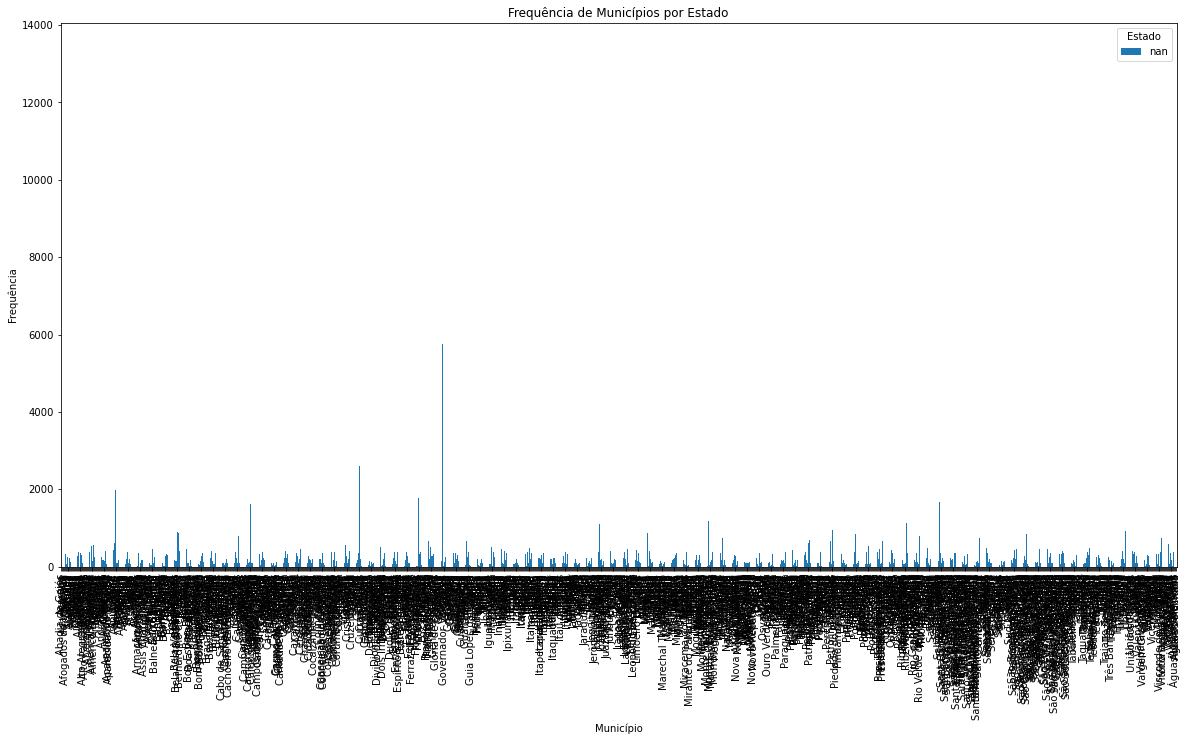

In [81]:
# Substituir as categorias na coluna "estado"
cs.estado.replace({'municipio': 'municipioNotificacao'}, inplace=True)

# Calcular a frequência de cada município em relação aos estados
contagem = cs.groupby(['municipio', 'estado']).size().unstack().fillna(0)

# Plotar o gráfico de barras empilhadas
contagem.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.xlabel('Município')
plt.ylabel('Frequência')
plt.title('Frequência de Municípios por Estado')
plt.legend(title='Estado')
plt.show()


## Avaliação do modelo

In [82]:
pd.crosstab(cs['estado'], date['oot'])

oot,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01
estado,,,,,,,,,,
nan,1,1,1,1,1,1,1,1,1,1


# a - Criar um pipeline utilizando o sklearn pipeline para o preprocessamento 

## Pré processamento

In [83]:
from pycaret.classification import *

In [84]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


X_digits, y_digits = load_digits(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=10)

pca = PCA(n_components=20)

scaler = StandardScaler()

logistic = LogisticRegression(max_iter=200)


In [85]:
X_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [86]:
X_digits.shape

(1797, 64)

In [87]:
X_train.shape

(1257, 64)

In [88]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [89]:
pca.fit(X_train)
X_train =  pca.transform(X_train)

In [90]:
logistic.fit(X_train, y_train)

logistic.predict(X_train)

array([0, 0, 0, ..., 2, 1, 2])

In [91]:
X_test = scaler.transform(X_test)

In [92]:
X_test = pca.transform(X_test)

In [93]:
logistic.predict(X_test)

array([5, 2, 5, 4, 8, 3, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 6,
       6, 7, 8, 8, 5, 8, 9, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 1,
       2, 9, 6, 1, 9, 4, 4, 5, 8, 4, 8, 5, 9, 7, 8, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 9, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 2, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 2, 4, 6, 0, 8, 8, 1, 1, 7, 3, 9, 5, 2, 3, 3, 9, 7, 6,
       2, 5, 4, 3, 8, 7, 6, 7, 2, 7, 4, 9, 5, 1, 9, 8, 6, 1, 8, 1, 4, 0,
       9, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 5, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 3, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 9, 1, 5,
       4, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 5, 7, 0, 8, 6, 2, 5, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 1, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 4, 6, 2, 2, 0, 8, 4, 7, 3, 3,

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=10)

# Define a PCA to Linear dimensionality reduction
pca_pipe = PCA(n_components=15)

# Define a Standard Scaler to normalize inputs
scaler_pipe = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic_pipe = LogisticRegression(max_iter=200)


In [95]:
pipe = Pipeline(steps=[("scaler", scaler_pipe), 
                       ("pca", pca_pipe), 
                       ("logistic", logistic_pipe)])

In [96]:
pipe.named_steps

{'scaler': StandardScaler(),
 'pca': PCA(n_components=15),
 'logistic': LogisticRegression(max_iter=200)}

In [97]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=15)),
                ('logistic', LogisticRegression(max_iter=200))])

In [98]:
pipe.predict(X_train)

array([0, 0, 0, ..., 1, 8, 2])

In [99]:
pipe.predict(X_test)

array([5, 2, 5, 4, 8, 1, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 6,
       6, 7, 8, 8, 5, 8, 9, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 1,
       2, 3, 6, 1, 9, 4, 4, 9, 8, 4, 8, 5, 9, 7, 1, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 3, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 2, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 2, 4, 6, 0, 8, 8, 1, 1, 7, 8, 9, 5, 2, 3, 3, 9, 7, 6,
       2, 5, 4, 3, 8, 4, 6, 7, 2, 7, 4, 9, 5, 1, 9, 8, 6, 1, 8, 1, 4, 0,
       9, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 9, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 8, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 0, 1, 5,
       4, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 8, 7, 0, 8, 6, 2, 5, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 1, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 4, 6, 2, 2, 0, 8, 4, 7, 3, 3,

In [100]:
pipe.named_steps

{'scaler': StandardScaler(),
 'pca': PCA(n_components=15),
 'logistic': LogisticRegression(max_iter=200)}

In [101]:
pipe.steps

[('scaler', StandardScaler()),
 ('pca', PCA(n_components=15)),
 ('logistic', LogisticRegression(max_iter=200))]

In [102]:
pipe[0]

StandardScaler()

In [103]:
pipe[1]

PCA(n_components=15)

In [104]:
pipe[2]

LogisticRegression(max_iter=200)

In [105]:
pipe[1].transform(X_train)

array([[  0.87099702, -12.61629429, -18.95619528, ...,   4.77035174,
         15.96019421,   3.88434758],
       [  7.39001009,  -7.84634568, -16.49062565, ...,   8.13175059,
         19.95968134,   2.7864999 ],
       [  8.2899884 , -10.02875882, -14.17149356, ...,   8.6604277 ,
         27.29236064,   4.24765738],
       ...,
       [-12.90636819, -12.77052565,  16.69170213, ...,   1.31721524,
         10.2947016 ,   6.73013349],
       [-12.20194486,  -2.58799019,   7.00762216, ...,   8.38571296,
          9.87358036,   2.9643598 ],
       [-11.21460688,   2.61271857,   2.68290716, ...,   3.72458422,
         18.63493964,  -4.70171626]])

In [106]:
pca_pipe.transform(X_train)

array([[  0.87099702, -12.61629429, -18.95619528, ...,   4.77035174,
         15.96019421,   3.88434758],
       [  7.39001009,  -7.84634568, -16.49062565, ...,   8.13175059,
         19.95968134,   2.7864999 ],
       [  8.2899884 , -10.02875882, -14.17149356, ...,   8.6604277 ,
         27.29236064,   4.24765738],
       ...,
       [-12.90636819, -12.77052565,  16.69170213, ...,   1.31721524,
         10.2947016 ,   6.73013349],
       [-12.20194486,  -2.58799019,   7.00762216, ...,   8.38571296,
          9.87358036,   2.9643598 ],
       [-11.21460688,   2.61271857,   2.68290716, ...,   3.72458422,
         18.63493964,  -4.70171626]])

### Criação de dummies


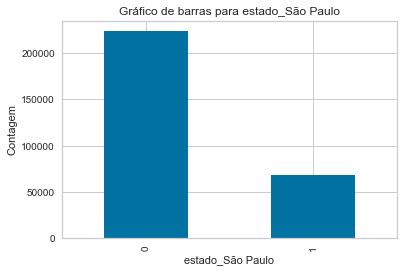

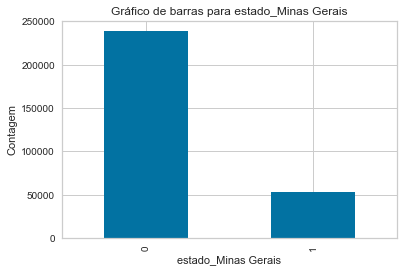

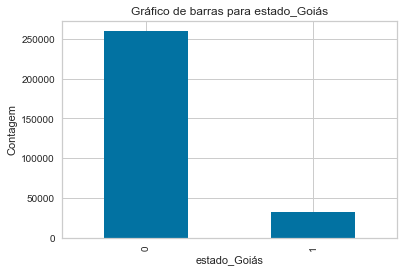

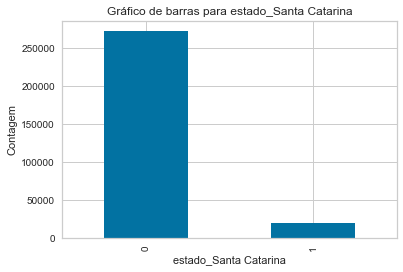

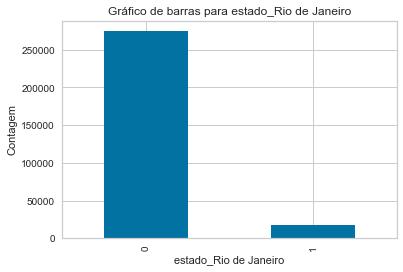

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar seu DataFrame a partir do arquivo CSV
cs = pd.read_csv('LeitoOcupacao.csv')

# Selecionar apenas algumas colunas para criar as variáveis dummy
columns_to_dummy = ['municipio', 'estado']
existing_columns = [col for col in columns_to_dummy if col in cs.columns]

# Gerar as variáveis dummy apenas para as colunas existentes
dummy = pd.get_dummies(cs[existing_columns])

# Calcular a contagem de cada variável dummy
dummy_counts = dummy.sum().sort_values(ascending=False)

# Selecionar as 5 variáveis dummy mais frequentes
top_dummy_columns = dummy_counts[:5].index

# Criar um gráfico de barras para cada uma das 5 variáveis dummy mais frequentes
for column in top_dummy_columns:
    plt.figure()
    dummy[column].value_counts().plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Contagem')
    plt.title(f'Gráfico de barras para {column}')
    plt.show()



In [108]:
dummy = pd.get_dummies(cs.estado, columns=['municpio', 'municipioNotificao', 'estado', 'estadoNotifcacao'])

In [109]:
dummy

,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
291873,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
291874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
291875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


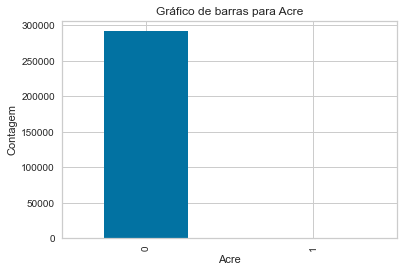

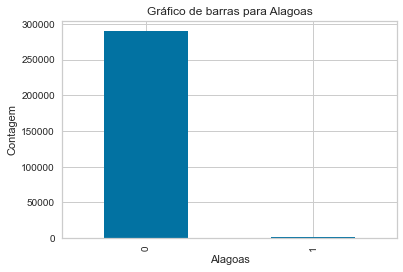

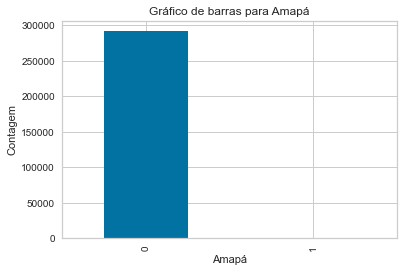

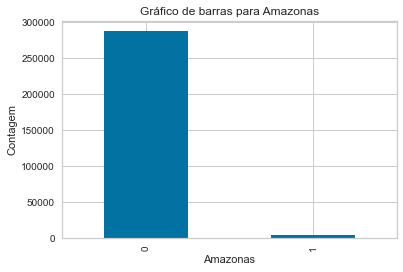

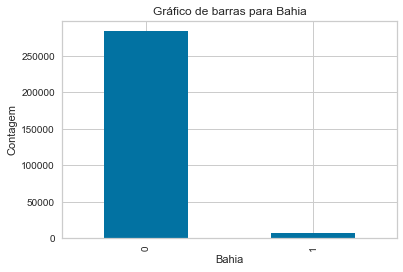

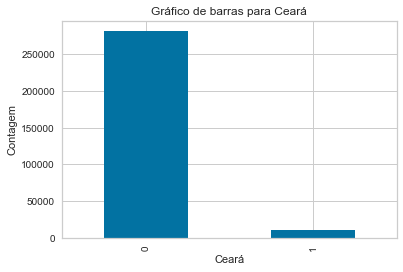

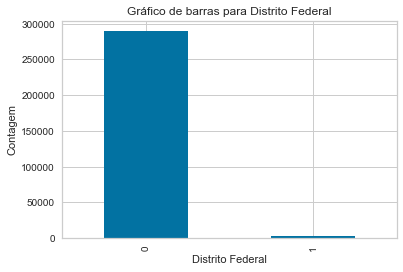

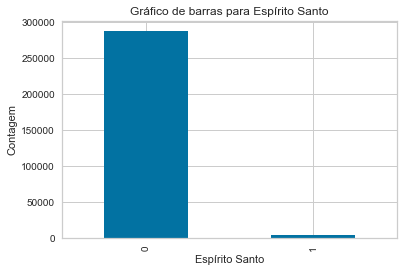

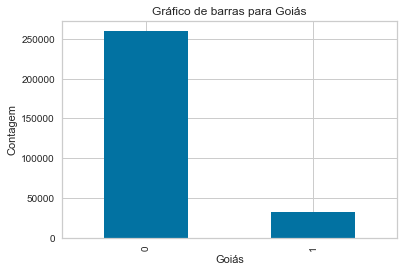

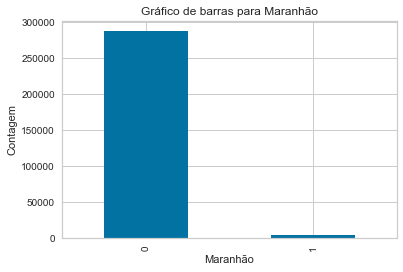

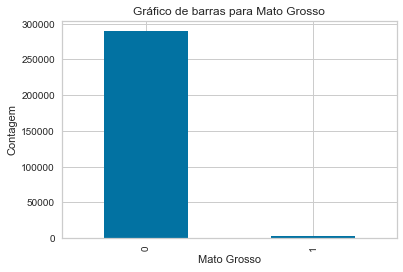

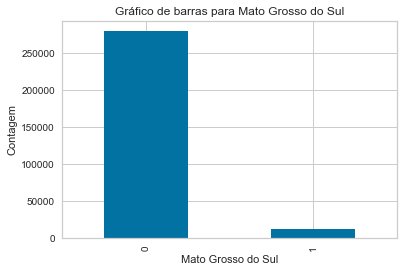

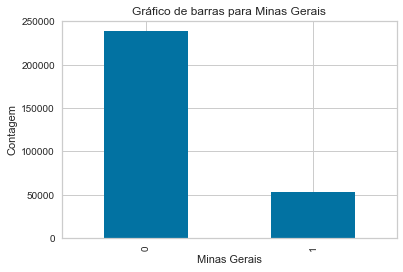

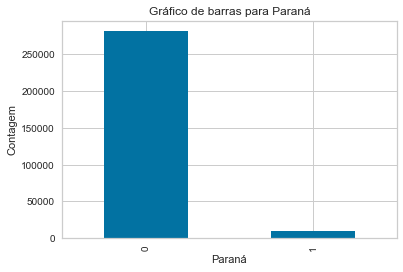

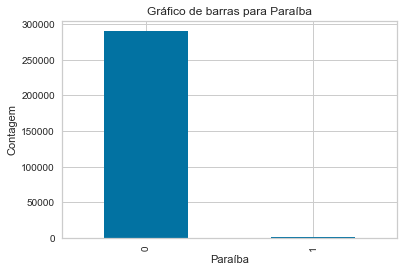

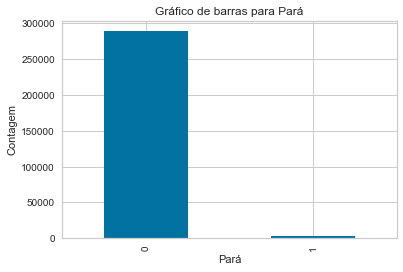

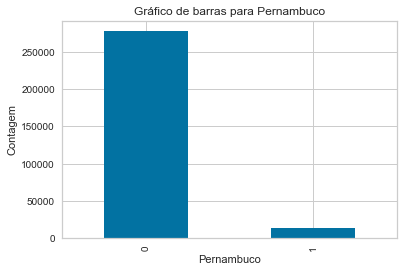

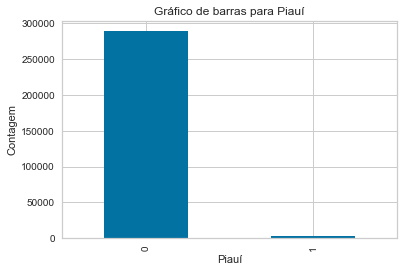

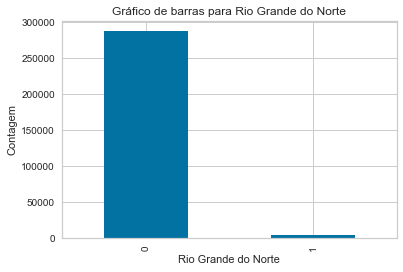

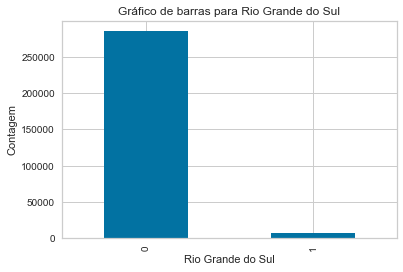

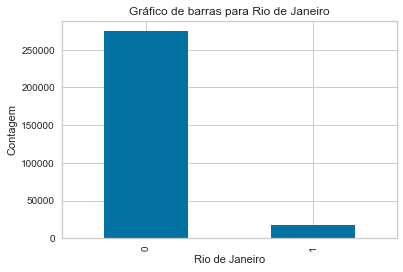

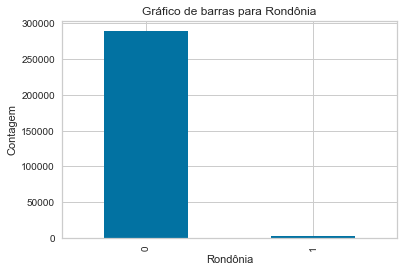

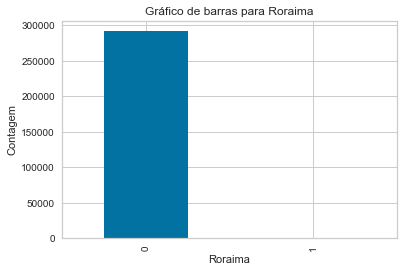

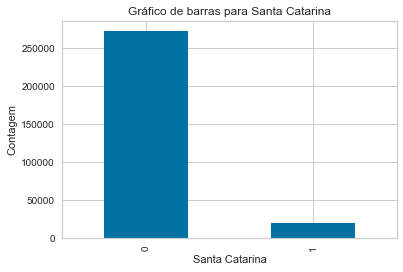

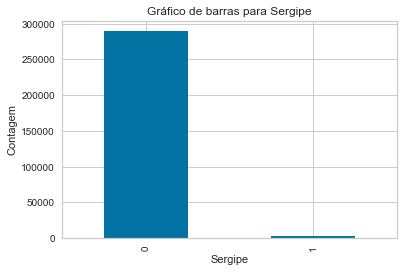

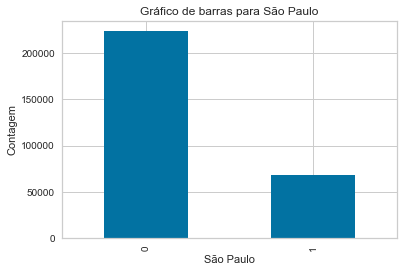

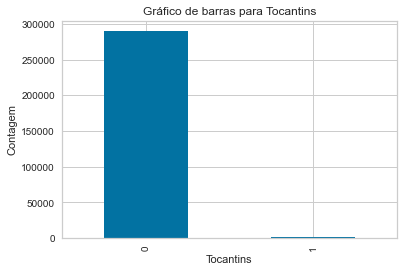

In [110]:
# Supondo que o DataFrame dummy seja chamado 'dummy'
dummy = pd.get_dummies(cs.estado, columns=['municipio', 'municipioNotificao', 'estado', 'estadoNotifcacao'])

# Criar um gráfico de barras para cada variável dummy
for column in dummy.columns:
    plt.figure()
    dummy[column].value_counts().plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Contagem')
    plt.title(f'Gráfico de barras para {column}')
    plt.show()

In [111]:
import numpy as np

data = {
    'Unnamed: 0': [0],
    '_id': [11],
    'dataNotificacao': [11],
    'cnes': [11],
    'ocupacaoSuspeitoCli': [291876],
    'ocupacaoSuspeitoUti': [291876],
    'ocupacaoConfirmadoCli': [291876],
    'ocupacaoConfirmadoUti': [291876],
    'ocupacaoCovidUti': [11],
    'ocupacaoCovidCli': [11],
    'ocupacaoHospitalarUti': [11],
    'ocupacaoHospitalarCli': [11],
    'saidaSuspeitaObitos': [11],
    'saidaSuspeitaAltas': [11],
    'saidaConfirmadaObitos': [11],
    'saidaConfirmadaAltas': [11],
    'origem': [11],
    '_p_usuario': [11],
    'estadoNotificacao': [11],
    'municipioNotificacao': [11],
    'estado': [11],
    'municipio': [11],
    'excluido': [11],
    'validado': [11],
    '_created_at': [11],
    '_updated_at': [11]
}

# Criar a matriz a partir do dicionário de dados
matriz = np.array(list(data.values())).T

print(matriz)


[[     0     11     11     11 291876 291876 291876 291876     11     11
      11     11     11     11     11     11     11     11     11     11
      11     11     11     11     11     11]]


In [112]:
# Supondo que você tenha um DataFrame chamado 'cs' com uma coluna chamada 'estado'
dummy = pd.get_dummies(cs['estado'], columns=['municpio', 'municipioNotificao', 'estado', 'estadoNotifcacao'])
correlation_matrix = dummy.corr()

print(correlation_matrix)

                         Acre   Alagoas     Amapá  Amazonas     Bahia  \
Acre                 1.000000 -0.003175 -0.001376 -0.004619 -0.006136   
Alagoas             -0.003175  1.000000 -0.003128 -0.010502 -0.013952   
Amapá               -0.001376 -0.003128  1.000000 -0.004550 -0.006045   
Amazonas            -0.004619 -0.010502 -0.004550  1.000000 -0.020297   
Bahia               -0.006136 -0.013952 -0.006045 -0.020297  1.000000   
Ceará               -0.007358 -0.016731 -0.007249 -0.024339 -0.032336   
Distrito Federal    -0.003372 -0.007668 -0.003322 -0.011155 -0.014820   
Espírito Santo      -0.004619 -0.010502 -0.004550 -0.015277 -0.020297   
Goiás               -0.013187 -0.029985 -0.012991 -0.043619 -0.057951   
Maranhão            -0.004521 -0.010280 -0.004454 -0.014955 -0.019868   
Mato Grosso         -0.003415 -0.007764 -0.003364 -0.011295 -0.015005   
Mato Grosso do Sul  -0.007912 -0.017990 -0.007794 -0.026170 -0.034768   
Minas Gerais        -0.017605 -0.040029 -0.017343 -

In [115]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Supondo que você tenha um DataFrame chamado 'cs' com as colunas 'municipio', 'municipioNotificacao', 'estado' e 'estadoNotificacao'
cs = pd.DataFrame({
    'municipio': ['municipio1', 'municipio2', 'municipio3'],
    'municipioNotificacao': ['municipioNot1', 'municipioNot2', 'municipioNot3'],
    'estado': ['estado1', 'estado2', 'estado3'],
    'estadoNotificacao': ['estadoNot1', 'estadoNot2', 'estadoNot3']
})

# Supondo que você tenha um array ou série com as classes reais chamado 'y_true'
y_true = cs[['municipio', 'municipioNotificacao']].values.flatten()

# Supondo que você tenha um array ou série com as classes previstas pelo modelo chamado 'y_pred'
y_pred = cs[['estado', 'estadoNotificacao']].values.flatten()

# Calcula a matriz de confusão
confusion_matrix = confusion_matrix(y_true, y_pred)

print(confusion_matrix)



[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]]


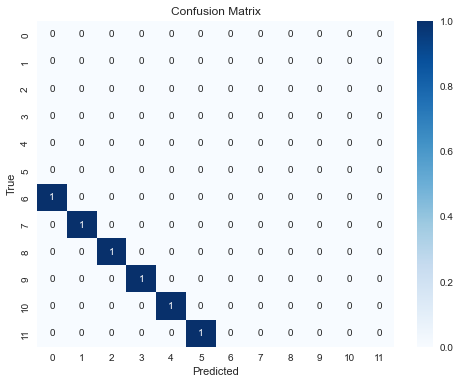

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Supondo que você tenha um DataFrame chamado 'cs' com as colunas 'municipio', 'municipioNotificacao', 'estado' e 'estadoNotificacao'
cs = pd.DataFrame({
    'municipio': ['municipio1', 'municipio2', 'municipio3'],
    'municipioNotificacao': ['municipioNot1', 'municipioNot2', 'municipioNot3'],
    'estado': ['estado1', 'estado2', 'estado3'],
    'estadoNotificacao': ['estadoNot1', 'estadoNot2', 'estadoNot3']
})

# Supondo que você tenha um array ou série com as classes reais chamado 'y_true'
y_true = cs[['municipio', 'municipioNotificacao']].values.flatten()

# Supondo que você tenha um array ou série com as classes previstas pelo modelo chamado 'y_pred'
y_pred = cs[['estado', 'estadoNotificacao']].values.flatten()

# Calcula a matriz de confusão
confusion_matrix = confusion_matrix(y_true, y_pred)

# Plota o gráfico de calor da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



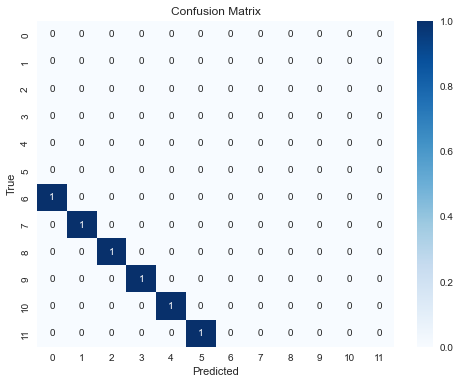

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cs = pd.DataFrame({
    'municipio': ['municipio1', 'municipio2', 'municipio3'],
    'municipioNotificacao': ['municipioNot1', 'municipioNot2', 'municipioNot3'],
    'estado': ['estado1', 'estado2', 'estado3'],
    'estadoNotificacao': ['estadoNot1', 'estadoNot2', 'estadoNot3']
})

# Supondo que você tenha um array ou série com as classes reais chamado 'y_true'
y_true = cs[['municipio', 'municipioNotificacao']].values.flatten()

# Supondo que você tenha um array ou série com as classes previstas pelo modelo chamado 'y_pred'
y_pred = cs[['estado', 'estadoNotificacao']].values.flatten()

# Calcula a matriz de confusão
confusion_matrix = confusion_matrix(y_true, y_pred)

# Plota o gráfico de calor da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [121]:
import numpy as np
from sklearn.metrics import confusion_matrix as cm

# Supondo que você tenha a matriz de confusão armazenada em 'cm'
confusion_matrix = cm(y_true, y_pred)

# TP: verdadeiros positivos
TP = np.diag(confusion_matrix)

# FP: falsos positivos
FP = np.sum(confusion_matrix, axis=0) - TP

# FN: falsos negativos
FN = np.sum(confusion_matrix, axis=1) - TP

# TN: verdadeiros negativos
TN = np.sum(confusion_matrix) - (TP + FP + FN)

# Acurácia
accuracy = (TP + TN) / np.sum(confusion_matrix)

# Precisão
precision = TP / (TP + FP)

# Revocação
recall = TP / (TP + FN)

# F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Imprimir os resultados
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Revocação:", recall)
print("F1-Score:", f1_score)



Acurácia: [0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333]
Precisão: [ 0.  0.  0.  0.  0.  0. nan nan nan nan nan nan]
Revocação: [nan nan nan nan nan nan  0.  0.  0.  0.  0.  0.]
F1-Score: [nan nan nan nan nan nan nan nan nan nan nan nan]


In [122]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix as cm

# Supondo que você tenha a matriz de confusão armazenada em 'cm'
confusion_matrix = cm(y_true, y_pred)

# TP: verdadeiros positivos
TP = np.diag(confusion_matrix)

# FP: falsos positivos
FP = np.sum(confusion_matrix, axis=0) - TP

# FN: falsos negativos
FN = np.sum(confusion_matrix, axis=1) - TP

# TN: verdadeiros negativos
TN = np.sum(confusion_matrix) - (TP + FP + FN)

# Acurácia
accuracy = (TP + TN) / np.sum(confusion_matrix)

# Precisão
precision = TP / (TP + FP)

# Revocação
recall = TP / (TP + FN)

# F1-Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Criar um DataFrame com as métricas
metrics_df = pd.DataFrame({
    'Verdadeiros Positivos (TP)': TP,
    'Falsos Positivos (FP)': FP,
    'Falsos Negativos (FN)': FN,
    'Verdadeiros Negativos (TN)': TN,
    'Acurácia': accuracy,
    'Precisão': precision,
    'Revocação': recall,
    'F1-Score': f1_score
})

# Exibir o DataFrame de métricas
print(metrics_df)


    Verdadeiros Positivos (TP)  Falsos Positivos (FP)  Falsos Negativos (FN)  \
0                            0                      1                      0   
1                            0                      1                      0   
2                            0                      1                      0   
3                            0                      1                      0   
4                            0                      1                      0   
5                            0                      1                      0   
6                            0                      0                      1   
7                            0                      0                      1   
8                            0                      0                      1   
9                            0                      0                      1   
10                           0                      0                      1   
11                           0          

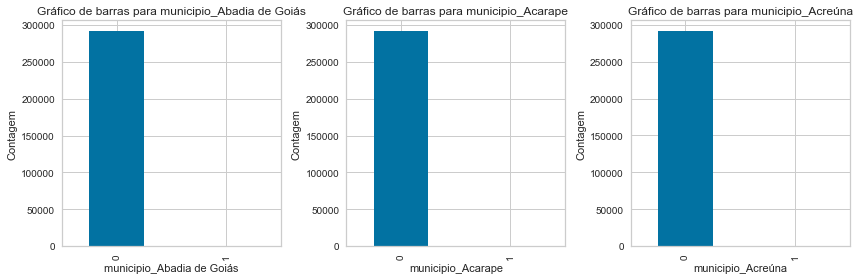

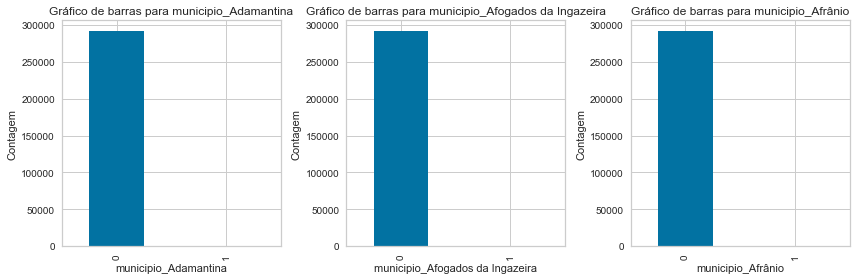

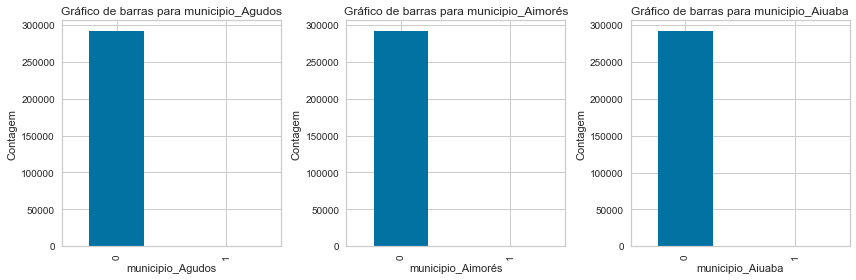

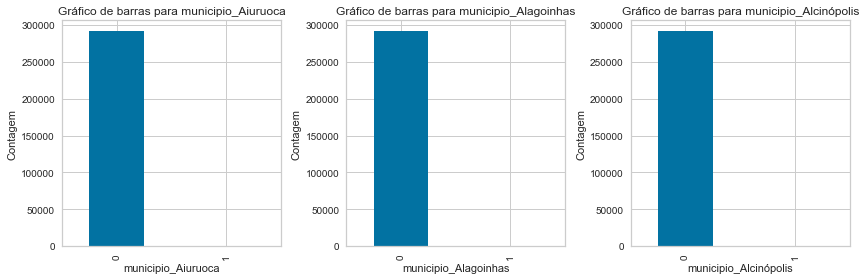

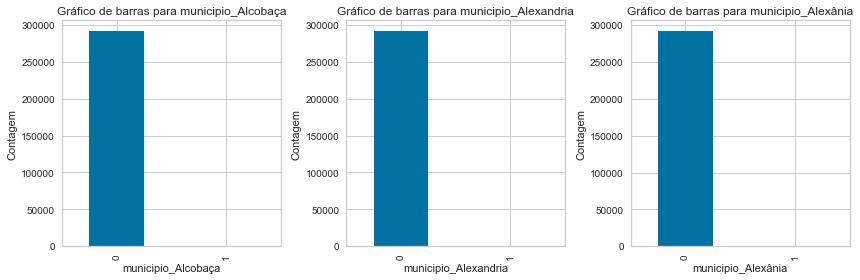

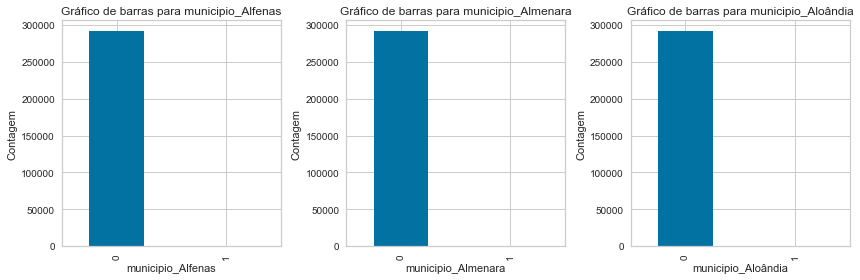

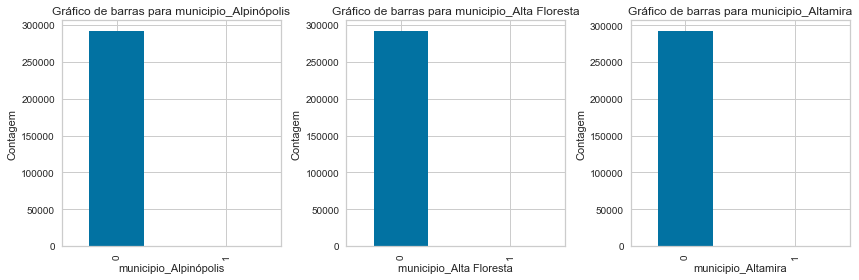

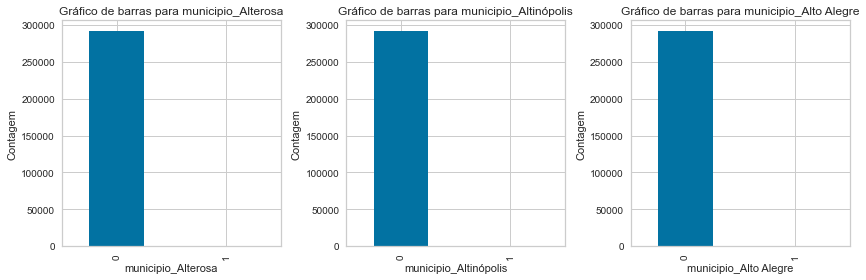

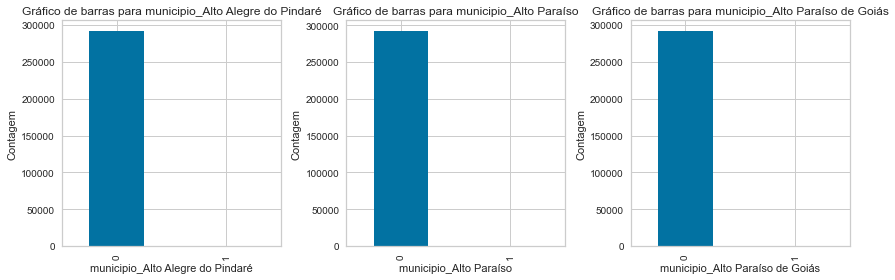

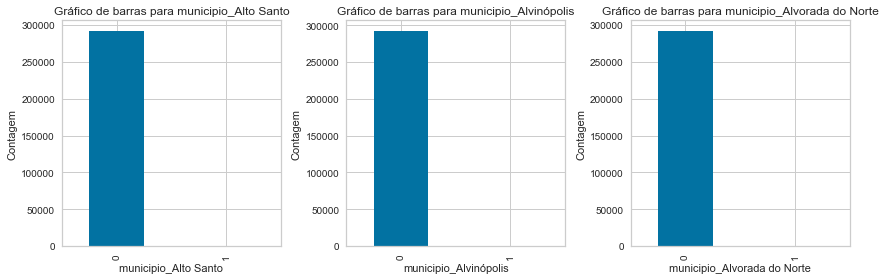

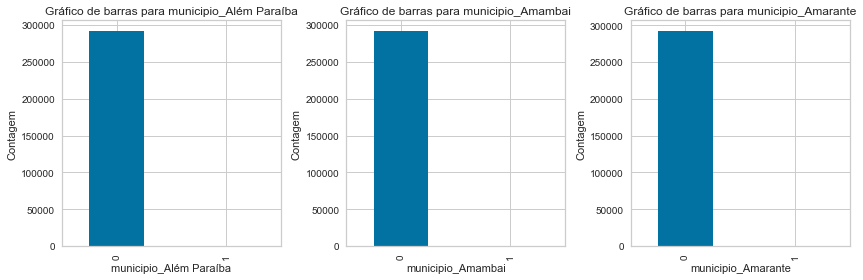

KeyboardInterrupt: 

In [127]:
batch_size = 3  # Quantidade de gráficos por lote
total_columns = len(dummy.columns)
num_batches = int(np.ceil(total_columns / batch_size))

for batch in range(num_batches):
    start_idx = batch * batch_size
    end_idx = (batch + 1) * batch_size
    columns_batch = dummy.columns[start_idx:end_idx]

    fig, axs = plt.subplots(nrows=1, ncols=len(columns_batch), figsize=(12, 4))

    for i, column in enumerate(columns_batch):
        ax = axs[i]
        dummy[column].value_counts().plot(kind='bar', ax=ax)
        ax.set_xlabel(column)
        ax.set_ylabel('Contagem')
        ax.set_title(f'Gráfico de barras para {column}')

    plt.tight_layout()
    plt.show()




#Conclusão 

Ocupação de leitos clínicos e de UTI por pacientes suspeitos: As variáveis ocupacaoSuspeitoCli e ocupacaoSuspeitoUti indicam a ocupação de leitos clínicos e de UTI, respectivamente, por pacientes suspeitos de estarem infectados com COVID-19. Essas variáveis podem fornecer insights sobre a demanda por leitos enquanto os pacientes aguardam a confirmação do diagnóstico. É importante monitorar essas ocupações para garantir que haja capacidade suficiente para atender a esses pacientes.

Ocupação de leitos clínicos e de UTI por pacientes confirmados: As variáveis ocupacaoConfirmadoCli e ocupacaoConfirmadoUti representam a ocupação de leitos clínicos e de UTI, respectivamente, por pacientes com COVID-19 confirmado. Essas variáveis são indicativas da gravidade dos casos e da necessidade de cuidados hospitalares especializados. É essencial acompanhar essas ocupações para garantir que haja leitos e recursos adequados para atender a esses pacientes.

Ocupação total de leitos de UTI e clínicos para COVID-19: As variáveis ocupacaoCovidUti e ocupacaoCovidCli refletem a ocupação total de leitos de UTI e clínicos, respectivamente, destinados a pacientes com COVID-19, independentemente de estarem confirmados ou apenas suspeitos. Essas variáveis fornecem uma visão geral da demanda geral por leitos específicos para COVID-19 e podem auxiliar no planejamento e na alocação de recursos.

Ocupação hospitalar de leitos de UTI e clínicos: As variáveis ocupacaoHospitalarUti e ocupacaoHospitalarCli indicam a ocupação total de leitos de UTI e clínicos em um hospital, incluindo pacientes com COVID-19 e outras condições médicas que necessitam de cuidados intensivos. Essas variáveis fornecem uma visão abrangente da ocupação hospitalar, levando em consideração diferentes tipos de pacientes. É importante monitorar essas ocupações para garantir a disponibilidade de leitos para todos os pacientes que necessitam de cuidados hospitalares.

Saídas de pacientes: As variáveis saidaSuspeitaObitos, saidaSuspeitaAltas, saidaConfirmadaObitos e saidaConfirmadaAltas representam as saídas de pacientes, indicando tanto os óbitos como as altas médicas, tanto para casos suspeitos como para casos confirmados de COVID-19. Essas variáveis podem fornecer informações sobre a evolução dos casos, a taxa de mortalidade e a recuperação dos pacientes.

Em resumo, o acompanhamento dessas variáveis de ocupação de leitos e saídas de pacientes pode auxiliar na gestão e no planejamento dos recursos hospitalares, permitindo uma melhor resposta ao enfrentamento da pandemia de COVID-19.